# Non-linear Classification

We will compare last weeks linear classification  of images to non-linear, tree-based methods.


## Required packages

If you are not on Google Colab, then you might have to install `sklearn`.

From a terminal:
```
pip install -U sklearn
```
from Jupyter:
```python
!pip install -U sklearn
```

## Import the necessary packages

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.svm import LinearSVC  # Linear reference classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Enable EXPERIMENTAL!
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


## Download the data
We will use the ```fetch_openml``` helper function from ```sklearn.datasets``` to download the data from [openml.org](https://www.openml.org/d/40926). The data is a small version of the CIFAR-10 dataset, called ```CIFAR_10_small```. The CIFAR-10 data set is described on [Alex Krizhevsky's homepage](https://www.cs.toronto.edu/~kriz/cifar.html)

In [3]:
data = fetch_openml(name='CIFAR_10_small')

### Look at some images

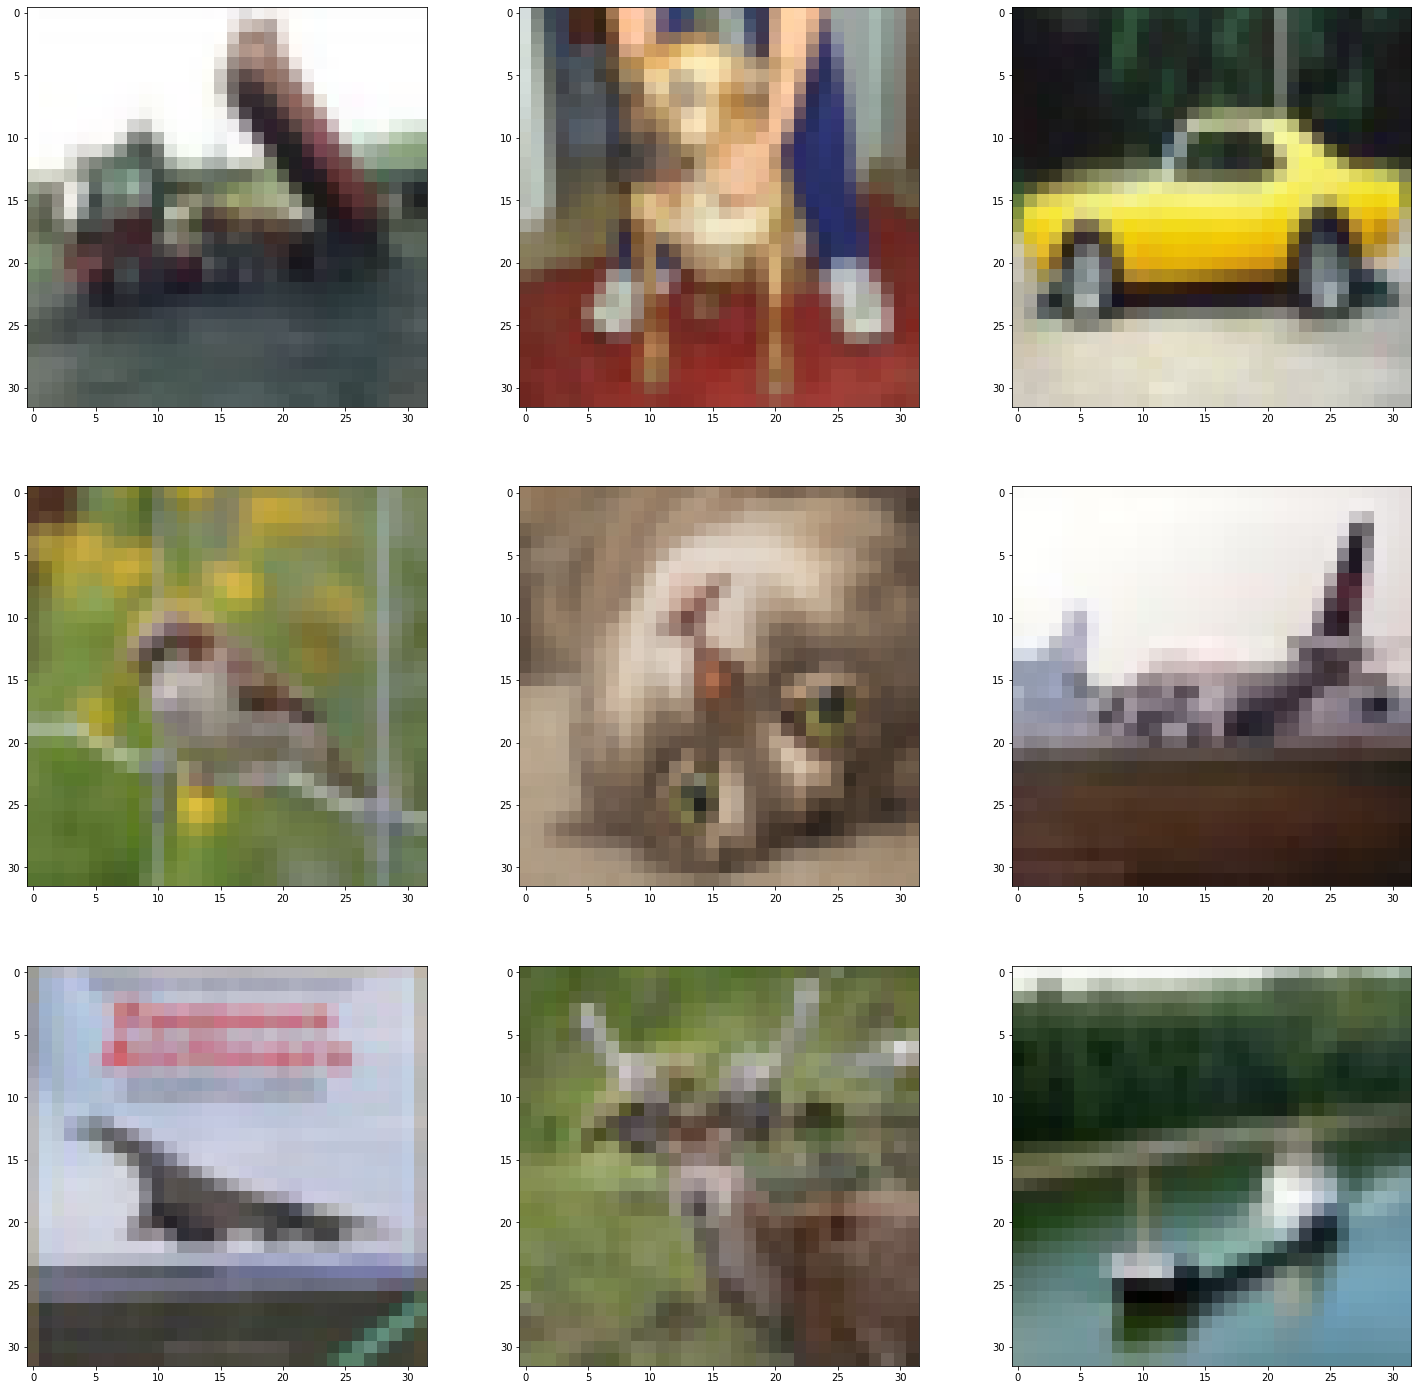

In [4]:
# Reshape and normalize 9 "random" images
im0 = data.data.loc[2].values.reshape(-1,32,32).transpose(1,2,0)/255.
im1 = data.data.loc[51].values.reshape(-1,32,32).transpose(1,2,0)/255.
im2 = data.data.loc[823].values.reshape(-1,32,32).transpose(1,2,0)/255.

im3 = data.data.loc[1024].values.reshape(-1,32,32).transpose(1,2,0)/255.
im4 = data.data.loc[2011].values.reshape(-1,32,32).transpose(1,2,0)/255.
im5 = data.data.loc[8023].values.reshape(-1,32,32).transpose(1,2,0)/255.

im6 = data.data.loc[10003].values.reshape(-1,32,32).transpose(1,2,0)/255.
im7 = data.data.loc[15004].values.reshape(-1,32,32).transpose(1,2,0)/255.
im8 = data.data.loc[19023].values.reshape(-1,32,32).transpose(1,2,0)/255.

# make a 3 x 3 figure
fig = plt.figure(figsize=(25,25))
# first image
ax = fig.add_subplot(331)
ax.imshow(im0)
# second image
ax = fig.add_subplot(332)
ax.imshow(im1)
# third image
ax = fig.add_subplot(333)
ax.imshow(im2)
# 4th image
ax = fig.add_subplot(334)
ax.imshow(im3)
# 5th image
ax = fig.add_subplot(335)
ax.imshow(im4)
# 6th image
ax = fig.add_subplot(336)
ax.imshow(im5)
# 7th image
ax = fig.add_subplot(337)
ax.imshow(im6)
# 8th image
ax = fig.add_subplot(338)
ax.imshow(im7)
# 9th image
ax = fig.add_subplot(339)
ax.imshow(im8)

## Preprocessing

Instead of all 10 classes, we want to just use the following three: airplane, automobile and deer. From ```data.DESCR``` we can see that these corresponds to the integers 0, 1 and 4.
### Normalize the data and remove all classes except three

The images are stored as ```uint8```, i.e. unsigned 8-bit integers, where the min value is 0 and max is 255. 

In [6]:
y = data.target.astype(int).copy()
X = data.data / 255.
keep_ids = np.logical_or(y<2, y==4)
y = y[keep_ids]
X = X[keep_ids]

### Data split
We need to split the data into training and test sets. The former is used to train, or fit, the model, and the latter is used to test, or evaluate, the model.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Multi-class classification
The task is not a binary classification task, but a mulit-class since we have three and not just two classes.

![Multi-class](https://drive.google.com/uc?id=1rnyu4qrFy2BUFCq8eFVxVLwXZ9MkOXCD)

Image credit: [Alex Krizhevsky](https://cs231n.github.io/linear-classify/)
<!-- ![Network architecture](https://drive.google.com/uc?id=1-MSS49rORx9oMw4uBvbckHO1vx1fDV8i) -->


## Fit a linear model to use as a benchmark
Instantiate the learner.

In [9]:
cls_svc = LinearSVC(max_iter=500)
cls_log = LogisticRegression(max_iter=500)

Fit the model on the data.

In [10]:
cls_svc.fit(X_train, y_train)
cls_log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=500)

Evaluate the model's performance.

In [12]:
cls_svc.score(X_test, y_test)


0.6862876254180602

In [13]:
cls_log.score(X_test, y_test)

0.6996655518394649

## Bagging classifier

Use sklearn's `BaggingClassifier()` and `DecisionTreeClassifier()` to instantiate the learner.

In [14]:
cls_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())

Fit the model on the data.

In [15]:
cls_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

Evaluate the model's performance.

In [16]:
cls_bag.score(X_test, y_test)

0.7357859531772575

## Random Forest classifier
Instantiate a random forest classifer using sklearn's `RandomForestClassifier()`.

In [17]:
cls_rf = RandomForestClassifier()

Fit the model on the data.

In [18]:
cls_rf.fit(X_train, y_train)

RandomForestClassifier()

Evaluate the model's performance.

In [19]:
cls_rf.score(X_test, y_test)

0.7866220735785954

## Gradient Boosting classifier
Instantiate and fit a Gradient boosting classifier in a single line using sklearns `GradientBoostingClassifier`.

In [23]:
cls_xgb = XGBClassifier()
cls_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

Evaluate the model's performance.

In [24]:
cls_xgb.score(X_test, y_test)

0.8006688963210702

## A faster gradient boosting implementation

Sklearn's `HistGradientBoostingClassifier()` and `HistGradientBoostingRegressor()`, inspired by [LightGBM](https://github.com/Microsoft/LightGBM) (see [LightGBM](https://scikit-learn.org/stable/modules/ensemble.html#lightgbm)). These histogram-based estimators can be orders of magnitude faster than `GradientBoostingClassifier()` and `GradientBoostingRegressor()` when the number of samples is larger than tens of thousands of samples.

Let's try the `HistGradientBoostingClassifier`.

In [8]:
cls = HistGradientBoostingClassifier()
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

0.8153846153846154

**Question**: What is the best classifier?

**Question**: Do you expect to get at least as good result on an unseen data set?